<a href="https://colab.research.google.com/github/Shubham1509-ux/Nifty-50-Stocks-Prediction/blob/main/Nifty50_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Download historical data for NIFTY-50 (assuming Yahoo Finance data)
ticker = '^NSEI'  # Ticker symbol for NIFTY-50
start_date = '2010-01-01'
end_date = '2023-01-01'
nifty_data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Fill missing values
nifty_data.fillna(method='ffill', inplace=True)

# Calculate Returns and Volatility (e.g., using a rolling window of 20 days)
nifty_data['Daily_Return'] = nifty_data['Adj Close'].pct_change()
nifty_data['20_Day_MA'] = nifty_data['Adj Close'].rolling(window=20).mean()
nifty_data['Volatility'] = nifty_data['Adj Close'].rolling(window=20).std()

# Drop NA values created by rolling calculations
nifty_data.dropna(inplace=True)


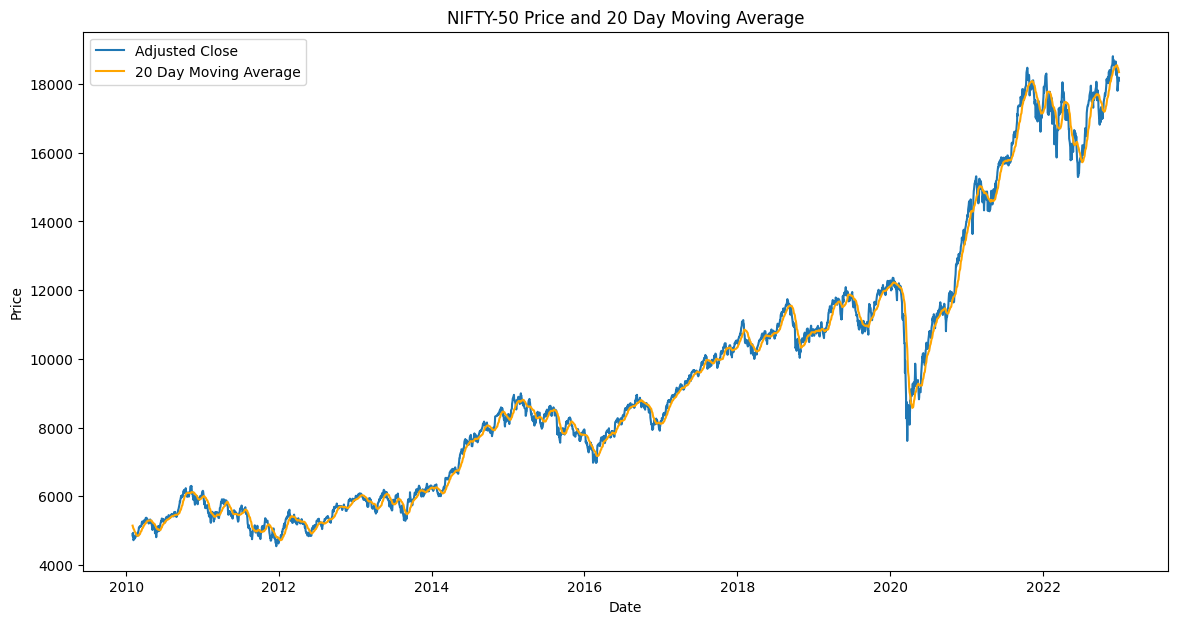

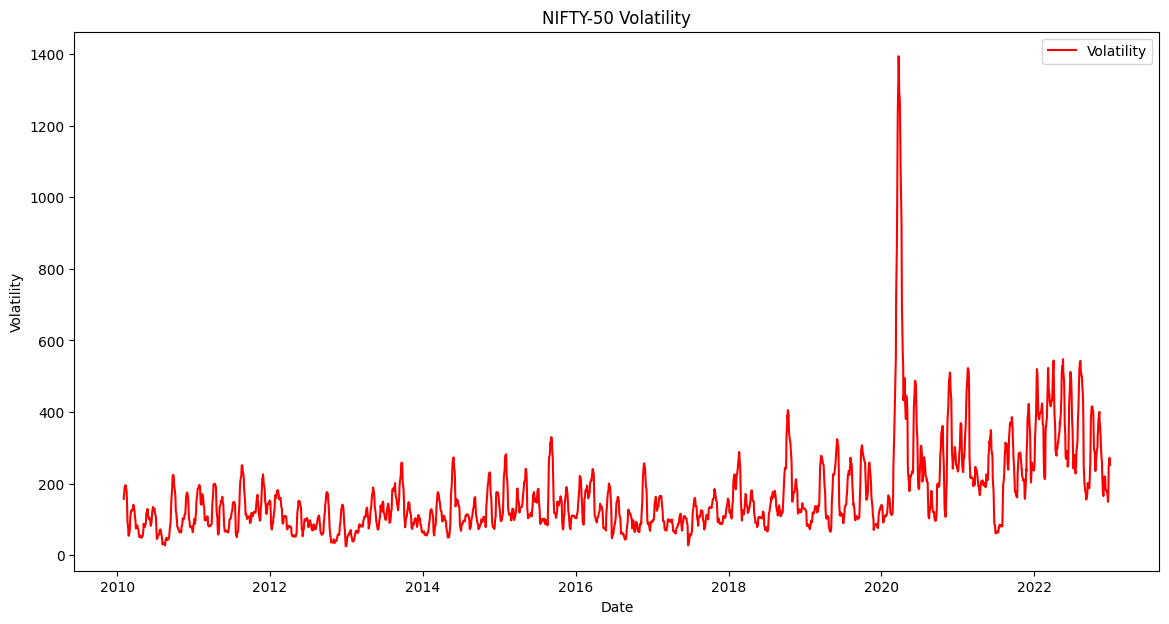

In [ ]:
# Plot the adjusted close prices and 20-day moving average
plt.figure(figsize=(14,7))
plt.plot(nifty_data['Adj Close'], label='Adjusted Close')
plt.plot(nifty_data['20_Day_MA'], label='20 Day Moving Average', color='orange')
plt.title('NIFTY-50 Price and 20 Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot Volatility
plt.figure(figsize=(14,7))
plt.plot(nifty_data['Volatility'], label='Volatility', color='red')
plt.title('NIFTY-50 Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()



In [ ]:
# Use adjusted close price as target variable
train_size = int(len(nifty_data) * 0.8)
train, test = nifty_data['Adj Close'][:train_size], nifty_data['Adj Close'][train_size:]


In [ ]:
# Define the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))


RMSE: 6142.188505648684
MAPE: 0.34769872783568


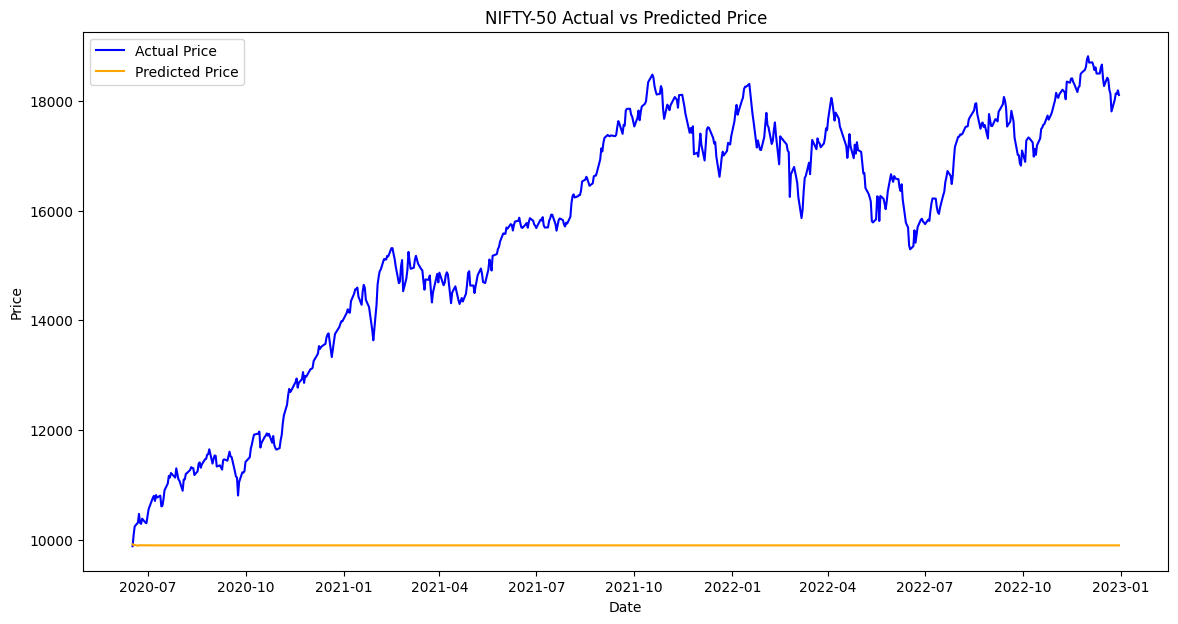

In [ ]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

# Plotting the Actual vs Forecasted values
plt.figure(figsize=(14,7))
plt.plot(test.index, test, label='Actual Price', color='blue')
plt.plot(test.index, forecast, label='Predicted Price', color='orange')
plt.title('NIFTY-50 Actual vs Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Calculate cumulative returns
nifty_data['Cumulative_Return'] = (1 + nifty_data['Daily_Return']).cumprod()

# Determine High and Low Performers
high_performers = nifty_data[nifty_data['Daily_Return'] > nifty_data['Daily_Return'].quantile(0.75)]
low_performers = nifty_data[nifty_data['Daily_Return'] < nifty_data['Daily_Return'].quantile(0.25)]

print("High Performers Sample:")
print(high_performers[['Adj Close', 'Daily_Return']].head())
print("\nLow Performers Sample:")
print(low_performers[['Adj Close', 'Daily_Return']].head())


High Performers Sample:
Price                        Adj Close Daily_Return
Ticker                           ^NSEI             
Date                                               
2010-02-03 00:00:00+00:00  4931.850098     0.021066
2010-02-08 00:00:00+00:00  4760.399902     0.008848
2010-02-09 00:00:00+00:00  4792.649902     0.006775
2010-02-11 00:00:00+00:00  4826.850098     0.014641
2010-02-16 00:00:00+00:00  4855.750000     0.011204

Low Performers Sample:
Price                        Adj Close Daily_Return
Ticker                           ^NSEI             
Date                                               
2010-02-02 00:00:00+00:00  4830.100098    -0.014205
2010-02-04 00:00:00+00:00  4845.350098    -0.017539
2010-02-05 00:00:00+00:00  4718.649902    -0.026149
2010-02-10 00:00:00+00:00  4757.200195    -0.007397
2010-02-15 00:00:00+00:00  4801.950195    -0.005159


In [ ]:
!pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=eba200bde4394e6d538830e657a667c2986c33ef8f556ed2523828247950b09b
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
# Ensure 'Adj Close' is a Series
adj_close_series = nifty_data['Adj Close'].squeeze()

# Compute RSI
rsi_indicator = RSIIndicator(close=adj_close_series, window=14)
nifty_data['RSI'] = rsi_indicator.rsi()

# Compute MACD
macd_indicator = MACD(close=adj_close_series)
nifty_data['MACD'] = macd_indicator.macd_diff()

# Bollinger Bands calculation
nifty_data['Bollinger_High'] = adj_close_series.rolling(20).mean() + (adj_close_series.rolling(20).std() * 2)
nifty_data['Bollinger_Low'] = adj_close_series.rolling(20).mean() - (adj_close_series.rolling(20).std() * 2)

# Drop NA values created by rolling calculations
nifty_data.dropna(inplace=True)


In [ ]:
# Visualize a sample of the data with new features
print(nifty_data[['Adj Close', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low']].head())


Price                        Adj Close        RSI      MACD Bollinger_High  \
Ticker                           ^NSEI                                       
Date                                                                         
2010-03-22 00:00:00+00:00  5205.200195  67.807768  8.358264    5346.256100   
2010-03-23 00:00:00+00:00  5225.299805  69.371521  5.595553    5351.526139   
2010-03-25 00:00:00+00:00  5260.399902  71.935314  5.056814    5358.147331   
2010-03-26 00:00:00+00:00  5282.000000  73.410348  5.067195    5358.489311   
2010-03-29 00:00:00+00:00  5302.850098  74.787841  5.361798    5351.461179   

Price                     Bollinger_Low  
Ticker                                   
Date                                     
2010-03-22 00:00:00+00:00   4806.353860  
2010-03-23 00:00:00+00:00   4837.973812  
2010-03-25 00:00:00+00:00   4870.387630  
2010-03-26 00:00:00+00:00   4912.385640  
2010-03-29 00:00:00+00:00   4963.723782  


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(nifty_data[['Adj Close']])

# Create sequences (X: past values, y: next value)
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.0115 - val_loss: 0.0010
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 2.4712e-04 - val_loss: 0.0011
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 2.6674e-04 - val_loss: 0.0013
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 2.7115e-04 - val_loss: 0.0011
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 2.0760e-04 - val_loss: 0.0017
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 2.1225e-04 - val_loss: 0.0046
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 2.5102e-04 - val_loss: 0.0015
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 1.7456e-04 - val_loss: 7.5855e-04
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 2.0005e-04 - val_loss: 0.0023
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 1.2924e-04 - val_loss: 0.0012
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 1.6087e-04 - val_loss: 0.0012
Epoch 12/20
77/77 

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


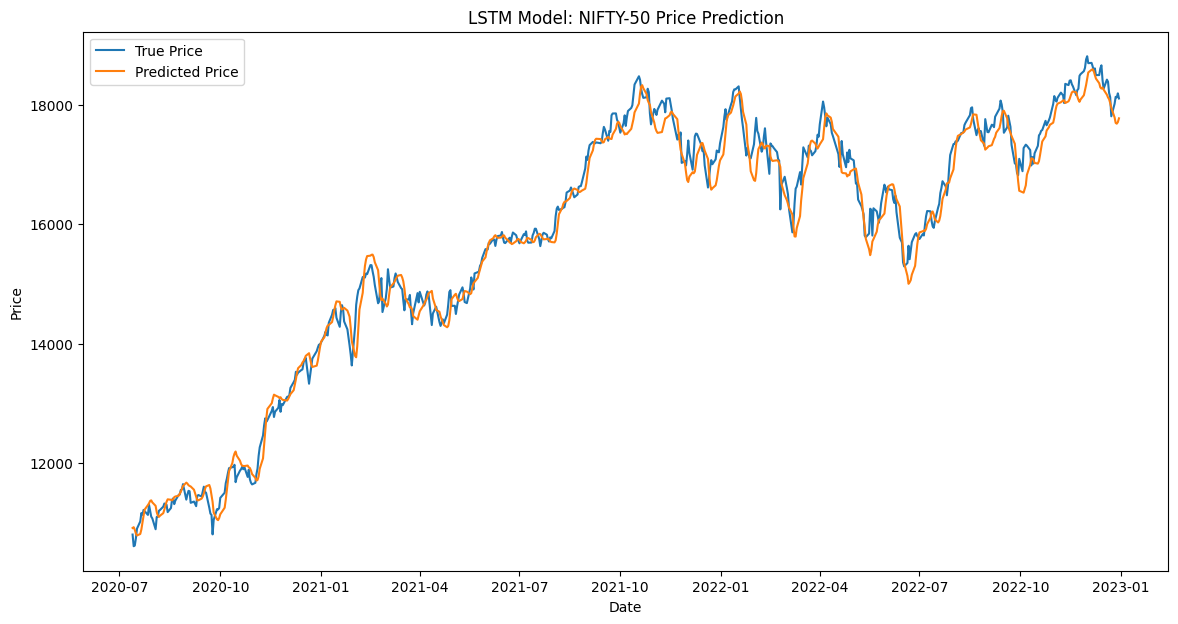

In [ ]:
# Make predictions and scale back
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Scale back the test data
y_test_scaled = scaler.inverse_transform([y_test])

# Plot the results
plt.figure(figsize=(14,7))
plt.plot(nifty_data.index[-len(y_test):], y_test_scaled[0], label='True Price')
plt.plot(nifty_data.index[-len(predictions):], predictions, label='Predicted Price')
plt.title('LSTM Model: NIFTY-50 Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Evaluate model performance
r2 = r2_score(y_test_scaled[0], predictions)
mae = mean_absolute_error(y_test_scaled[0], predictions)
rmse = np.sqrt(mean_squared_error(y_test_scaled[0], predictions))
mape = mean_absolute_percentage_error(y_test_scaled[0], predictions)

print(f"R-squared: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")


R-squared: 0.9857785733136424
MAE: 202.1008316634538
RMSE: 261.5651454093829
MAPE: 0.012879149361122859
